## Prediction of Students' performance (scores) based on the hours spend on their studies

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [3]:
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Datasets\score.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: xlabel='Hours', ylabel='Scores'>

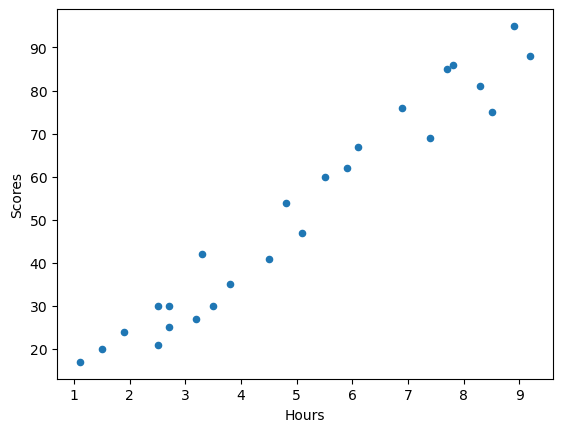

In [5]:
df.plot(x='Hours',y='Scores',kind='scatter')

# Linear regression model
- y(score)=a+b * x(Hours)

In [6]:
X=df["Hours"]
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [7]:
y=df['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

# Splitting data into training and testing sets

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [20]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17,)
(8,)
(17,)
(8,)


In [22]:
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


## Modelling the data

In [24]:
# Perform Linear Regression 
from sklearn.linear_model import LinearRegression
# Representing linear regression as lr(Creating LinearRegression object )
lr= LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.intercept_

2.370815382341881

In [26]:
lr.coef_

array([9.78856669])

In [27]:
y_pred=lr.predict(X_test)

In [28]:
type(y_pred)

numpy.ndarray

In [39]:
y_pred.shape

(8,)

In [29]:
y_test.shape

(8,)

## Visualizing actual and predicted values of Students' scores

In [30]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

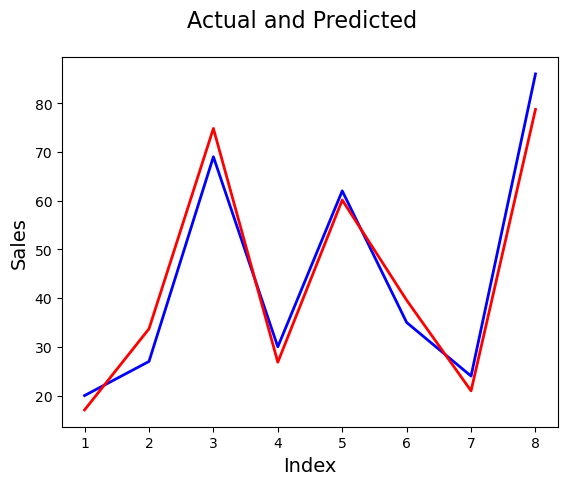

In [38]:
c=[i for i in range(1,9,1)]   #generating index
fig=plt.figure()
plt.plot(c,y_test,color='blue', linewidth=2, linestyle='-')
plt.plot(c,y_pred,color='red', linewidth=2, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=16)
plt.xlabel('Index',fontsize=14)
plt.ylabel('Sales',fontsize=14)

Text(0, 0.5, 'ytest-ypred')

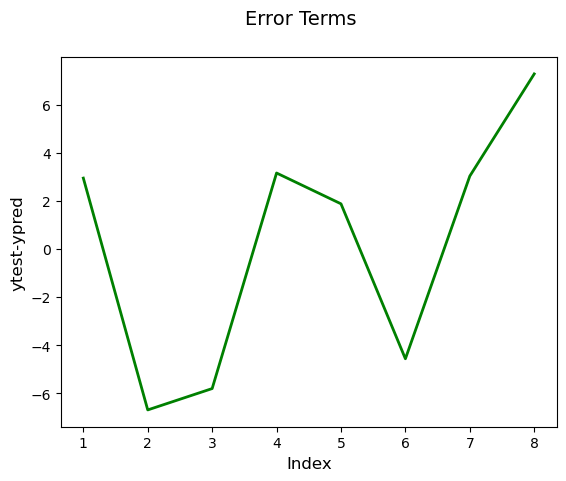

In [32]:
# Error terms
c=[i for i in range(1,9,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='green',linewidth=2,linestyle='-')
fig.suptitle('Error Terms', fontsize=14)
plt.xlabel('Index',fontsize=12)
plt.ylabel('ytest-ypred', fontsize=12)

## Evaluation of the model

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)


In [34]:
print('Mean Squared Error : ',mse)
print("R squared : ",r_squared)

Mean Squared Error :  22.96509721270043
R squared :  0.9568211104435257


In [ ]:
# mse=22.96 indicates that the model does not match with 22.96 % of the values
# R^2 =0.95 indicates that 95% of the student scores (y) are explained by the hours(x) they spent on it,
#i.e indicating a good fit

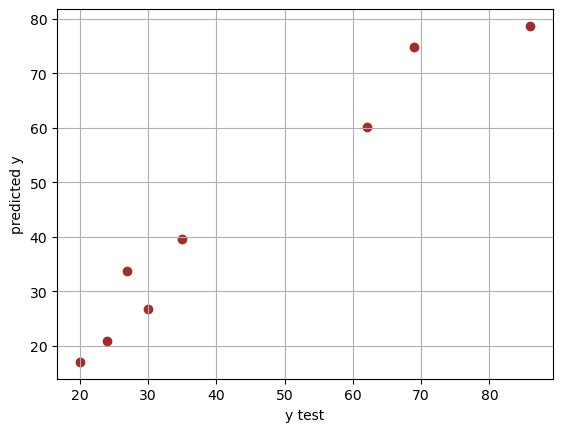

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='brown')
plt.xlabel('y test')
plt.ylabel('predicted y')
plt.grid()